<h1><center>Web Scrapping</center></h1>

<h3> Importing Required libraries<h3>

In [424]:
import pandas as pd
import numpy as np
import re
import requests
import csv
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

In [626]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import spacy
nlp = spacy.load("en_core_web_sm")
import random
random.seed(123)
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<h2> TASK-1</h2>

<h4>List of URL'S from 10th December to 1st December</h4>

In [360]:
urls=['https://news.ycombinator.com/front?day=2019-12-10&p={}',
    'https://news.ycombinator.com/front?day=2019-12-09&p={}','https://news.ycombinator.com/front?day=2019-12-08&p={}','https://news.ycombinator.com/front?day=2019-12-07&p={}',
    'https://news.ycombinator.com/front?day=2019-12-06&p={}','https://news.ycombinator.com/front?day=2019-12-05&p={}','https://news.ycombinator.com/front?day=2019-12-04&p={}',
     'https://news.ycombinator.com/front?day=2019-12-03&p={}','https://news.ycombinator.com/front?day=2019-12-02&p={}',
     'https://news.ycombinator.com/front?day=2019-12-01&p={}']

In [ ]:
#Creating DataFrame for mentioned fields.

In [361]:
dd={'Title':[],'Url':[],'Domain':[],'num_upvotes':[],'posted_by_user':[],'num_comments':[],'date_created':[]}

<h3>Collecting Data from above Urls for Title, Url, Domain, num_upvotes, posted_by_user, num_comments, date_created</h3>

In [362]:
for url in urls:
    for i in range(1,4):
        my_url=url.format(i)
        uClient=uReq(my_url)
        page_html=uClient.read()
        uClient.close()
        page_soup=soup(page_html,'html.parser')
        container1=page_soup.findAll('td',{'class':'title'})
        container2=page_soup.findAll('td',{'class':'subtext'})
        for container_1 in container1[1::2]:
            #a=container_1.findAll('a',{'class':'storylink'})
            dd['Title'].append(container_1.a.text)
            dd['Url'].append(container_1.a.get('href'))
            if len(container_1.findAll('span',{'class':'sitestr'}))>0:
                dd['Domain'].append(container_1.findAll('span',{'class':'sitestr'})[0].text)
            else:
                dd['Domain'].append('Null')
            
        for container_2 in container2:
            dd['num_upvotes'].append(container_2.find('span',{'class':'score'}).text)
            dd['posted_by_user'].append(container_2.find('a',{'class':'hnuser'}).text)
            dd['num_comments'].append(container_2.findAll('a')[-1].text)
            dd['date_created'].append(container_2.find('span',{'class':'age'}).text)
            
df=pd.DataFrame(dd)   
    

In [363]:
df

,Title,Url,Domain,num_upvotes,posted_by_user,num_comments,date_created
0,ZedRipper: A 16-core Z80 laptop,http://www.chrisfenton.com/the-zedripper-part-1/,chrisfenton.com,730 points,pmarin,121 comments,1 day ago
1,White House Veterans Helped Gulf Monarchy Buil...,https://www.reuters.com/investigates/special-r...,reuters.com,493 points,mzs,95 comments,1 day ago
2,Why databases use ordered indexes but programm...,https://www.evanjones.ca/ordered-vs-unordered-...,evanjones.ca,425 points,matt_d,196 comments,2 days ago
3,Facebook Tells Barr It Won’t Open Up Encrypted...,https://www.nytimes.com/2019/12/10/technology/...,nytimes.com,349 points,i_am_not_elon,271 comments,1 day ago
4,Asciinema – Record and share terminal sessions,https://asciinema.org/,asciinema.org,357 points,tomerbd,91 comments,1 day ago
...,...,...,...,...,...,...,...
862,Most Europeans Now Prefer AMD CPUs over Intel,https://www.techradar.com/uk/news/most-europea...,techradar.com,43 points,ekoutanov,15 comments,9 days ago
863,Spam and Phishing in Q3 2019,https://securelist.com/spam-report-q3-2019/95177/,securelist.com,7 points,laurex,1 comment,11 days ago
864,"Jeffrey Epstein, blackmail, and a lucrative ‘h...",https://www.nytimes.com/2019/11/30/business/da...,nytimes.com,38 points,buildbuildbuild,14 comments,10 days ago
865,AMD Releases Radeon ProRender 2.1,https://www.blendernation.com/2019/11/30/amd-r...,blendernation.com,37 points,ekoutanov,discuss,10 days ago


<h4> Saving dataframe to csv file</h4>

In [364]:
df.to_csv('Final.csv',index=None)

<h3> Checking for Null in Domain field and removing from DataFrame<h3>

In [366]:
df[df['Domain']=='Null']

,Title,Url,Domain,num_upvotes,posted_by_user,num_comments,date_created
7,"Ask HN: We are shutting down our startup, I ge...",item?id=21743302,Null,371 points,sad_cofounder,208 comments,2 days ago
29,Ask HN: How to improve code quality while main...,item?id=21730125,Null,196 points,vcool07,174 comments,4 days ago
83,Show HN: A bookmarklet to remove clickgates on...,item?id=21756517,Null,67 points,timar,47 comments,23 hours ago
198,Ask HN: Why GraphQL APIs but no Datalog APIs?,item?id=21738331,Null,161 points,networked,106 comments,2 days ago
249,Ask HN: What are some examples of well-designe...,item?id=21737529,Null,143 points,orbOfOrthanc,91 comments,3 days ago
250,Ask HN: What tech choices make “new” Reddit so...,item?id=21738571,Null,235 points,epistasis,158 comments,2 days ago
254,Ask HN: How many email addresses do you active...,item?id=21737918,Null,21 points,chdaniel,89 comments,3 days ago
257,Ask HN: Are Startups similar to college admiss...,item?id=21733918,Null,23 points,barnettx,20 comments,3 days ago
266,Ask HN: What mistakes did you make when starti...,item?id=21728436,Null,601 points,kartickv,266 comments,4 days ago
329,Ask HN: Why do tech startup owners do not own ...,item?id=21732694,Null,39 points,codesternews,23 comments,3 days ago


In [367]:
df[df['Domain']=='Null'].shape

(21, 7)

In [368]:
df_final=df[df['Domain']!='Null']

<h4> After removinf null values in Data Frame saving into CSV</h4>

In [369]:
df_final.to_csv('Final_1.csv',index=None)

In [370]:
df_final[df_final['Domain']=='Null']

,Title,Url,Domain,num_upvotes,posted_by_user,num_comments,date_created


In [405]:
df_final=pd.read_csv('Final_1.csv')

In [406]:
df_final.shape

(846, 7)

<h2>TASK-2</h2>

<h3>Extracting the full article from its respective website</h3>

In [420]:
cc={'Content':[]}


In [421]:
for i in df_final['Url']:
    #headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
    try:
        response=requests.get(i)
        if response.status_code==200:
            page_soup=soup(response.content,'html.parser')
            form_p_all = page_soup.select('p > form') # Selecting forms that are there inside the paragraphs
            for form in form_p_all:
                form.decompose()
            
        #Navigations in the side
            nav_div = page_soup.find_all('div', id=re.compile(".*[nav].$"))
            for nav in nav_div:
                nav.decompose()

            text_links = page_soup.select('p > a') # Selecting the links that are present inside the paragraph
            for text_link in text_links:
                text_link.replaceWith('')
                text_link.decompose()
            
            text_all=page_soup.find_all('p')
            text_data=""
            for text in text_all: 
                text_data = text_data +" " +text.text.lower()
            if len(text_data)>100:
                cc['Content'].append(text_data)
            else:
                cc['Content'].append('Url is pointing to home page not the story')
        else:
            cc['Content'].append(response.status_code)
    except:
        cc['Content'].append('Having issue in collecting Data')
        
b=pd.DataFrame(cc)      

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

In [422]:
#b=pd.read_csv('content.csv',delimiter='\t',sep=',', quoting=csv.QUOTE_NONE, encoding='utf-8',engine='python')

<h4> Here I captured reasons, when retrving articles</h4>


<li>Checking for Status code 200</li>
<li>If Status code not equal to 200 then capturing status code in content extration</li>
<li>If text has length less than 100, then considering has some issues in url where it might point to Home page of website</li>
<li>If any issues other than above, we are capturing it as issues in collecting data</li>    


<h4> Concating with Task1 dataframe</h4>

In [ ]:
final_webscraping_df=pd.concat([df_final,b],axis=1)

In [537]:
import copy
print(type(final_webscraping_df['Content']))
original_data = copy.deepcopy(final_webscraping_df)
print(final_webscraping_df.keys())
print(original_data.keys())

<class 'pandas.core.series.Series'>
Index(['Title', 'Url', 'Domain', 'num_upvotes', 'posted_by_user',
       'num_comments', 'date_created', 'Content'],
      dtype='object')
Index(['Title', 'Url', 'Domain', 'num_upvotes', 'posted_by_user',
       'num_comments', 'date_created', 'Content'],
      dtype='object')


In [534]:
#original_data1=copy.deepcopy(original_data)

In [538]:
final_webscraping_df['Content'].value_counts()

Url is pointing to home page not the story                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [539]:
final_webscraping_df=final_webscraping_df[final_webscraping_df['Content']!='Url is pointing to home page not the story']
final_webscraping_df=final_webscraping_df[final_webscraping_df['Content']!=400]
final_webscraping_df=final_webscraping_df[final_webscraping_df['Content']!=403]
final_webscraping_df=final_webscraping_df[final_webscraping_df['Content']!='Having issue in collecting Data']
final_webscraping_df=final_webscraping_df[final_webscraping_df['Content']!=406]

In [540]:
final_webscraping_df['Content'].value_counts()

 to continue, please click the box below to let us know you're not a robot. please make sure your browser supports javascript and cookies and that you are not blocking them from loading. for more information you can review our  and . for inquiries related to this message please  and provide the reference id below.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [541]:
final_webscraping_df.shape

(593, 8)

In [545]:
a=final_webscraping_df['Content'][845]

In [546]:
final_webscraping_df=final_webscraping_df[final_webscraping_df['Content']!=a]

In [547]:
final_webscraping_df.shape

(586, 8)

In [548]:
final_webscraping_df.reset_index(inplace=True)

In [553]:
final_webscraping_df.drop('index',axis=1,inplace=True)

C:\Users\Lakshmi Narayana\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [555]:
final_webscraping_df.sample(5)

,Title,Url,Domain,num_upvotes,posted_by_user,num_comments,date_created,Content
478,Medieval Price List,http://medieval.ucdavis.edu/120D/Money.html,ucdavis.edu,347 points,danso,146 comments,11 days ago,courtesy of kenneth hodges (hodges@jif.berkel...
158,A single-celled organism that can live on mate...,https://www.vice.com/en_us/article/a35538/scie...,vice.com,52 points,gebt,12 comments,4 days ago,left: guillaume souvant/afp via getty images....
312,A Week in the Life of a McDonald’s Cashier,https://www.vice.com/en_us/article/zmjjnj/how-...,vice.com,307 points,danso,714 comments,6 days ago,cierra brown estimates her commute to work wo...
555,Cybersyn and Allende’s Semi-Automated Luxury S...,https://scottlocklin.wordpress.com/2019/02/26/...,scottlocklin.wordpress.com,95 points,jashkenas,104 comments,10 days ago,i wanted to ask you to write about this….yo...
359,The ominous opacity of the AWS bill – a cautio...,https://www.taloflow.ai/blog/ominous-aws-bill,taloflow.ai,203 points,usr1106,109 comments,8 days ago,we were only in the first week of the month-l...


In [556]:
final_webscraping_df.to_csv('webscrapping.csv',index=None)

<h1>TASK-3</h1>

In [781]:
df=pd.read_csv('webscrapping.csv')

In [783]:
df.shape

(586, 8)

In [784]:
df.head(2)

,Title,Url,Domain,num_upvotes,posted_by_user,num_comments,date_created,Content
0,Why databases use ordered indexes but programm...,https://www.evanjones.ca/ordered-vs-unordered-...,evanjones.ca,425 points,matt_d,196 comments,2 days ago,why databases use ordered indexes but program...
1,Facebook Tells Barr It Won’t Open Up Encrypted...,https://www.nytimes.com/2019/12/10/technology/...,nytimes.com,349 points,i_am_not_elon,271 comments,1 day ago,advertisement supported by with 1.5 billion u...


In [785]:
df['text'] = [text.strip().lower() for text in df['Content']]
df['Content'][:10]

0     why databases use ordered indexes but program...
1     advertisement supported by with 1.5 billion u...
2        start recording\n supports linux, macos an...
3     (sorry. normally there would be a video here ...
4     a high-performance, feature-packed library fo...
5     github is home to over 40 million developers ...
6     want to learn more?  physical crypto made fro...
7     we've detected that javascript is disabled in...
8     dec 10, 2019 by john wilander  this blog post...
9     biologist  created lindenmayer systems, or l-...
Name: Content, dtype: object

In [786]:
df['Content'] = [re.sub('’', "'", text) for text in df['Content']]
df['Content'][0]

' why databases use ordered indexes but programming uses hash tables   |   i think it is safe to state that hash tables (e.g. maps in go, dicts in python, hashmap in java, etc.) are far more common than ordered data structures such as trees for in-memory data structures. one data point is that in  (), the speaker noted that 1% of cpu and 4% of ram globally at google is used by hash tables. however, in databases, the default is almost always an ordered index, typically a . why is the "default" choice different between programs and databases, when at the end of the day they both do the same thing: accessing data for our code? more than a year ago i asked about this . this is my very delayed attempt to distill what i\'ve learned. the traditional answer is that hash tables are designed to be efficient when storing data in memory, while b-trees are designed for slower storage that is accessed in blocks. however, this is not a fundamental property of these data structures. there are hash tab

In [787]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #https://docs.python.org/2/library/unicodedata.html
    return text

In [788]:
df['Content'] = [remove_accented_chars(text) for text in df['Content']]
df['Content'][2]

"    start recording\n supports linux, macos and *bsd  record right where you work - in a terminal.\n          to start just run asciinema rec, to finish hit ctrl-d or type exit.   any time you see a command you'd like to try in your own terminal just\n    pause the player and copy-paste the content you want.\n          it's just a text after all!  easily embed an asciicast player in your blog post, project documentation page or in your conference talk slides.   "

In [790]:
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

In [791]:
df['Content'] = [scrub_words(text) for text in df['Content']]
df['Content'][2]

' start recording supports linux macos and bsd record right where you work in a terminal to start just run asciinema rec to finish hit ctrl d or type exit any time you see a command you d like to try in your own terminal just pause the player and copy paste the content you want it s just a text after all easily embed an asciicast player in your blog post project documentation page or in your conference talk slides '

In [792]:
df['word_count'] = [len(text.split(' ')) for text in df['text']]
pd.DataFrame(df['word_count']).describe()

,word_count
count,586.000000
mean,3797.331058
std,30926.635403
min,1.000000
25%,285.500000
50%,781.500000
75%,1853.000000
max,561035.000000


In [798]:
#df.drop('text',axis=1,inplace=True)

In [799]:
df.head(3)

,Title,Url,Domain,num_upvotes,posted_by_user,num_comments,date_created,Content,word_count
0,Why databases use ordered indexes but programm...,https://www.evanjones.ca/ordered-vs-unordered-...,evanjones.ca,425 points,matt_d,196 comments,2 days ago,why databases use ordered indexes but program...,1286
1,Facebook Tells Barr It Won’t Open Up Encrypted...,https://www.nytimes.com/2019/12/10/technology/...,nytimes.com,349 points,i_am_not_elon,271 comments,1 day ago,advertisement supported by with billion users...,909
2,Asciinema – Record and share terminal sessions,https://asciinema.org/,asciinema.org,357 points,tomerbd,91 comments,1 day ago,start recording supports linux macos and bsd ...,102


In [800]:
df.shape

(586, 9)

In [801]:
df1=pd.DataFrame(df)

In [802]:
df1.head(2)

,Title,Url,Domain,num_upvotes,posted_by_user,num_comments,date_created,Content,word_count
0,Why databases use ordered indexes but programm...,https://www.evanjones.ca/ordered-vs-unordered-...,evanjones.ca,425 points,matt_d,196 comments,2 days ago,why databases use ordered indexes but program...,1286
1,Facebook Tells Barr It Won’t Open Up Encrypted...,https://www.nytimes.com/2019/12/10/technology/...,nytimes.com,349 points,i_am_not_elon,271 comments,1 day ago,advertisement supported by with billion users...,909


In [814]:
df1.shape

(586, 9)

#### Removing all the Articles with words_count value less than first quartile (25%) of words_count attribute

In [815]:
## Getting the first quartile value
q1 = np.percentile(df1.word_count, 25)
print(f"The first quartile value of words_count attribute is {q1}")

The first quartile value of words_count attribute is 285.5


In [819]:
df2=df1[df1['word_count'] > 285.5]
print(type(df2))
df2.reset_index(inplace=True)
print(f"The shape of trimmed articles dataframe is {df1.shape}")

<class 'pandas.core.frame.DataFrame'>
The shape of trimmed articles dataframe is (586, 9)


In [822]:
df2.drop('index',axis=1,inplace=True)

In [825]:
df2.head(3)

,Title,Url,Domain,num_upvotes,posted_by_user,num_comments,date_created,Content,word_count
0,Why databases use ordered indexes but programm...,https://www.evanjones.ca/ordered-vs-unordered-...,evanjones.ca,425 points,matt_d,196 comments,2 days ago,why databases use ordered indexes but program...,1286
1,Facebook Tells Barr It Won’t Open Up Encrypted...,https://www.nytimes.com/2019/12/10/technology/...,nytimes.com,349 points,i_am_not_elon,271 comments,1 day ago,advertisement supported by with billion users...,909
2,Show HN: A guitar tab viewer that listens,https://www.fatpick.com/,fatpick.com,172 points,rodw,92 comments,1 day ago,sorry normally there would be a video here of...,341


## Stopwords, stemming, and tokenizing

In [756]:
## load spacy's English stopwords as variable called 'stopwords'

stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(stopwords))
print('First ten stop words: %s' % list(stopwords)[:10])
#stopwords.remove('no')
#stopwords.remove('not')

Number of stop words: 324
First ten stop words: ['there', 'me', 'again', 'become', 'has', 'were', 'then', 'among', 'up', 'through']


In [757]:
## Adding Custom stopwords to the spacy stopword list
customize_stop_words = ['apps','script','g','suite','apis', 'posted','amit','varma','essays','op-eds', 'th']

for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

In [697]:
import nltk

In [640]:
#nltk.download()

In [698]:
## It might be surprising, but spaCy doesn't contain any function for stemming as it relies on lemmatization only. 
## Therefore, in this section, we will use NLTK for stemming.

## load nltk's SnowballStemmer as variable 'stemmer'
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [758]:
def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]

    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            if len(token)>1:
                filtered_tokens.append(token)

    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
        
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            if len(token)>1:
                filtered_tokens.append(token)
            
            
    lemma = [t.lemma_ for t in filtered_tokens]
    return lemma

In [738]:
Content_Stemmed= []
Content_Lematized= []
nlp.max_length = 6500000
for idx,text in enumerate(df1['Content']):
    
        doc = nlp(text,disable = ['ner', 'parser'])
        
        print(f"processing {idx} document")
        words_stemmed = tokenize_and_stem(doc)
        Content_Stemmed.append(words_stemmed)
    
        words_lemmatized = tokenize_and_lemmatize(doc)
        Content_Lematized.append(words_lemmatized)

   

processing 0 document
processing 1 document
processing 2 document
processing 3 document
processing 4 document
processing 5 document
processing 6 document
processing 7 document
processing 8 document
processing 9 document
processing 10 document
processing 11 document
processing 12 document
processing 13 document
processing 14 document
processing 15 document
processing 16 document
processing 17 document
processing 18 document
processing 19 document
processing 20 document
processing 21 document
processing 22 document
processing 23 document
processing 24 document
processing 25 document
processing 26 document
processing 27 document
processing 28 document
processing 29 document
processing 30 document
processing 31 document
processing 32 document
processing 33 document
processing 34 document
processing 35 document
processing 36 document
processing 37 document
processing 38 document
processing 39 document
processing 40 document
processing 41 document
processing 42 document
processing 43 documen

processing 345 document
processing 346 document
processing 347 document
processing 348 document
processing 349 document
processing 350 document
processing 351 document
processing 352 document
processing 353 document
processing 354 document
processing 355 document
processing 356 document
processing 357 document
processing 358 document
processing 359 document
processing 360 document
processing 361 document
processing 362 document
processing 363 document
processing 364 document
processing 365 document
processing 366 document
processing 367 document
processing 368 document
processing 369 document
processing 370 document
processing 371 document
processing 372 document
processing 373 document
processing 374 document
processing 375 document
processing 376 document
processing 377 document
processing 378 document
processing 379 document
processing 380 document
processing 381 document
processing 382 document
processing 383 document
processing 384 document
processing 385 document
processing 386 d

In [707]:
spacy.__version__

'2.2.3'

In [826]:
df2.shape

(439, 9)

In [760]:
cleaning={'Content_Lematized':Content_Lematized,'Content_Stemmed':Content_Stemmed}

In [761]:
clean_df=pd.DataFrame(cleaning)

In [762]:
clean_df

,Content_Lematized,Content_Stemmed
0,"[database, use, order, index, programming, use...","[databas, use, order, index, program, use, has..."
1,"[advertisement, support, billion, user, facebo...","[advertis, support, billion, user, facebook, w..."
2,"[sorry, normally, video, fatpick, action, brow...","[sorri, normal, video, fatpick, action, browse..."
3,"[github, home, million, developer, work, host,...","[github, home, million, develop, work, host, r..."
4,"[ve, detect, javascript, disabled, browser, li...","[ve, detect, javascript, disabl, browser, like..."
...,...,...
434,"[today, day, national, blog, posting, month, n...","[today, day, nation, blog, post, month, nablop..."
435,"[darren, allan, look, future, purchase, intent...","[darren, allan, look, futur, purchas, intent, ..."
436,"[solution, register, numerous, scam, mailing, ...","[solut, regist, numer, scam, mail, relat, amaz..."
437,"[soon, sex, criminal, jeffrey, epstein, die, a...","[soon, sex, crimin, jeffrey, epstein, die, aug..."


In [827]:
df3=pd.concat([df2,clean_df],axis=1)

In [828]:
df3.shape

(439, 11)

In [830]:
df3.head(3)

,Title,Url,Domain,num_upvotes,posted_by_user,num_comments,date_created,Content,word_count,Content_Lematized,Content_Stemmed
0,Why databases use ordered indexes but programm...,https://www.evanjones.ca/ordered-vs-unordered-...,evanjones.ca,425 points,matt_d,196 comments,2 days ago,why databases use ordered indexes but program...,1286,"[database, use, order, index, programming, use...","[databas, use, order, index, program, use, has..."
1,Facebook Tells Barr It Won’t Open Up Encrypted...,https://www.nytimes.com/2019/12/10/technology/...,nytimes.com,349 points,i_am_not_elon,271 comments,1 day ago,advertisement supported by with billion users...,909,"[advertisement, support, billion, user, facebo...","[advertis, support, billion, user, facebook, w..."
2,Show HN: A guitar tab viewer that listens,https://www.fatpick.com/,fatpick.com,172 points,rodw,92 comments,1 day ago,sorry normally there would be a video here of...,341,"[sorry, normally, video, fatpick, action, brow...","[sorri, normal, video, fatpick, action, browse..."


In [859]:
df3['Content'][0]

' why databases use ordered indexes but programming uses hash tables i think it is safe to state that hash tables e g maps in go dicts in python hashmap in java etc are far more common than ordered data structures such as trees for in memory data structures one data point is that in the speaker noted that of cpu and of ram globally at google is used by hash tables however in databases the default is almost always an ordered index typically a why is the default choice different between programs and databases when at the end of the day they both do the same thing accessing data for our code more than a year ago i asked about this this is my very delayed attempt to distill what i ve learned the traditional answer is that hash tables are designed to be efficient when storing data in memory while b trees are designed for slower storage that is accessed in blocks however this is not a fundamental property of these data structures there are hash tables designed to be used on disk e g many in 

In [837]:
df3['Content_Stemmed_lines'] = [' '.join(text) for text in df3['Content_Stemmed']]
df3['Content_Lematized_lines'] = [' '.join(text) for text in df3['Content_Lematized']]
df3['Content_Lematized_lines'][0]

'database use order index programming use hash table think safe state hash table map dict python hashmap java etc far common order data structure tree memory data structure datum point speaker note cpu ram globally google hash table database default order index typically default choice different program database end day thing access datum code year ago ask delayed attempt distill ve learn traditional answer hash table design efficient store datum memory tree design slow storage access block fundamental property datum structure hash table design disk memory tree java treemap map think important answer tree general purpose result low total cost large persistent datum word slow single value access majority workload well consider rare operation cost multiple index article will briefly explain high level difference hash table tree discuss persistent datum different need memory datum finally think probably right default will try argue probably use order data structure memory hash table datab

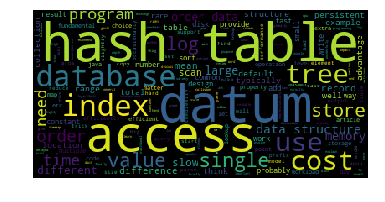

In [842]:
wordcloud=WordCloud().generate(df3['Content_Lematized_lines'][0])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

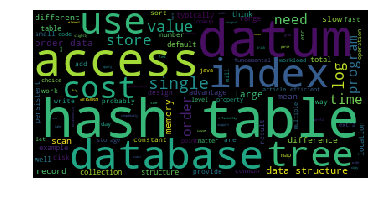

In [843]:
wordcloud=WordCloud(max_words=1000).generate(df3['Content_Lematized_lines'][0])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [845]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [847]:
! pip install gensim

  Running setup.py bdist_wheel for smart-open: started
  Running setup.py bdist_wheel for smart-open: finished with status 'done'
  Stored in directory: C:\Users\Lakshmi Narayana\AppData\Local\pip\Cache\wheels\ab\10\93\5cff86f5b721d77edaecc29959b1c60d894be1f66d91407d28
Successfully built smart-open


<h2> Topic Modeling Using Gensim</h2>

In [848]:
import gensim

In [850]:
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel

In [851]:
bigram = gensim.models.Phrases(df3['Content_Lematized'])

In [852]:
texts = [bigram[line] for line in df3['Content_Lematized']]

In [854]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [855]:
len(corpus)

439

In [856]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

<h3> Top 10 Topics</h3>

In [857]:
ldamodel.show_topics()

[(0,
  '0.007*"build" + 0.005*"time" + 0.005*"work" + 0.005*"like" + 0.004*"use" + 0.004*"say" + 0.004*"no" + 0.004*"version" + 0.003*"new" + 0.003*"people"'),
 (1,
  '0.006*"use" + 0.005*"work" + 0.005*"time" + 0.004*"build" + 0.004*"byte" + 0.004*"code" + 0.004*"way" + 0.004*"no" + 0.003*"program" + 0.003*"compile_time"'),
 (2,
  '0.026*"build" + 0.012*"version" + 0.012*"use" + 0.012*"dep" + 0.008*"time" + 0.008*"way" + 0.008*"package" + 0.008*"work" + 0.007*"no" + 0.006*"new"'),
 (3,
  '0.010*"build" + 0.008*"version" + 0.008*"time" + 0.007*"use" + 0.005*"new" + 0.005*"work" + 0.005*"dep" + 0.004*"program" + 0.004*"no" + 0.004*"late"'),
 (4,
  '0.011*"version" + 0.010*"build" + 0.008*"use" + 0.008*"time" + 0.007*"dep" + 0.006*"work" + 0.006*"no" + 0.005*"new" + 0.004*"late" + 0.004*"way"'),
 (5,
  '0.008*"use" + 0.007*"time" + 0.006*"build" + 0.006*"dep" + 0.006*"version" + 0.005*"work" + 0.005*"way" + 0.004*"code" + 0.004*"no" + 0.004*"program"'),
 (6,
  '0.006*"time" + 0.005*"use"